# BANCO GAMER

Banco mundialmente conhecido por realizar empréstimo para pessoas apaixonadas por games de diversas classes sociais.

Este projeto tem como objetivo definir a variavel target de acordo com as políticas e requisitos definidas pelos diretores e gerentes do banco e estudar os modelos de classificação e random forest na análise de crédito.

# 0 - IMPORTAÇÃO DO DATASET

In [1]:
# importacação de bibliotecas

import pandas as pd #dataframe
import seaborn as sns 
import matplotlib.pyplot as plt #graficos
import numpy as np #modelagem
from sklearn.ensemble import RandomForestClassifier #modelo random forest
from xgboost import XGBClassifier #modelo de classificação
from sklearn.preprocessing import LabelEncoder #transformar string para inteiros
from sklearn.model_selection import train_test_split #separar o dataset de treino e teste
from sklearn.metrics import confusion_matrix #medir métrica
from sklearn.metrics import classification_report #medir métrica
from sklearn.metrics import accuracy_score #medir métrica

In [2]:
# Importação do arquivo

import pandas as pd

file_path = "credit_risk_dataset_original.csv"
dataset_credit_risk = pd.read_csv(file_path)

print(type(dataset_credit_risk))
dataset_credit_risk.head(5)

<class 'pandas.core.frame.DataFrame'>


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_percent_income,cb_person_default_on_file
0,22,59000,RENT,123.0,PERSONAL,35000,0.59,Y
1,21,9600,OWN,5.0,EDUCATION,1000,0.10,N
2,25,9600,MORTGAGE,1.0,MEDICAL,5500,0.57,N
3,23,65500,RENT,4.0,MEDICAL,35000,0.53,N
4,24,54400,RENT,8.0,MEDICAL,35000,0.55,Y


In [3]:
"""Dicionario dos dados"""

# person_age - Idade (X = Caracteristicas)
# person_income - Renda Anual (X = Caracteristicas)
# person_home_ownership - Casa própria (X = Caracteristicas)
# person_emp_length - Duração do emprego (em anos) (X = Caracteristicas)
# loan_intent - Intenção de empréstimo (X = Caracteristicas)
# loan_amnt - Valor do empréstimo (X = Caracteristicas)
# loan_percent_income - Percentual de renda (X = Caracteristicas)
# cb_person_default_on_file - Inadimplência histórica (X = Caracteristicas)

'Dicionario dos dados'

# 1 - ANÁLISE EXPLORATÓRIA

In [4]:
# Verifica registros invalidos que possuem campos sem informacao 

contagem = dataset_credit_risk.isnull().sum()
contagem

person_age                     0
person_income                  0
person_home_ownership          0
person_emp_length            895
loan_intent                    0
loan_amnt                      0
loan_percent_income            0
cb_person_default_on_file      0
dtype: int64

In [5]:
# Verifica registros duplicados

validacao_de_duplicados = dataset_credit_risk.duplicated().sum()

if validacao_de_duplicados == 0:
    print("ótimo, Nao existem registros duplicados")
else:
    print("Existem registros duplicados, precisa tratar na modelagem")

Existem registros duplicados, precisa tratar na modelagem


In [6]:
# Avaliando os tipos das minhas variaveis

dataset_credit_risk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   person_age                 32581 non-null  int64  
 1   person_income              32581 non-null  int64  
 2   person_home_ownership      32581 non-null  object 
 3   person_emp_length          31686 non-null  float64
 4   loan_intent                32581 non-null  object 
 5   loan_amnt                  32581 non-null  int64  
 6   loan_percent_income        32581 non-null  float64
 7   cb_person_default_on_file  32581 non-null  object 
dtypes: float64(2), int64(3), object(3)
memory usage: 2.0+ MB


In [7]:
#Analisando como está a aleatoriedade de pedidos de crédito para para atingir um
#grupo de pessoas onde a possuo pouco aleatoriedade atingindo a massa

valores_unicos = dataset_credit_risk["loan_amnt"]
valores_unicos = pd.DataFrame(valores_unicos, columns=["loan_amnt"])
valores_unicos = valores_unicos.describe().round(2)
valores_unicos = valores_unicos.rename(columns={'loan_amnt':'estatísticas descritivas'})
valores_unicos

,estatísticas descritivas
count,32581.00
mean,9589.37
std,6322.09
min,500.00
25%,5000.00
50%,8000.00
75%,12200.00
max,35000.00


{'whiskers': [<matplotlib.lines.Line2D at 0x7f5dd0d58580>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5dd0d58ac0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5dd0d582e0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f5dd0d58ee0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f5dd0d59180>],
 'means': []}

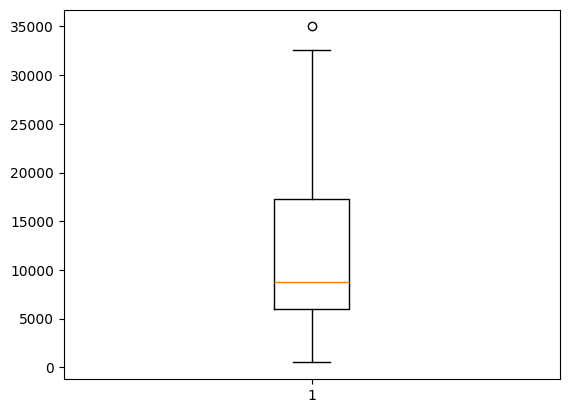

In [8]:
#Plotando as estatísticas descritivas

fig = plt.boxplot(valores_unicos)
fig

- Com o gráfico é possível analisar que não possuímos quase nenhum outlier, facilitando o trabalhar de identificar a massa que 
será concentrado a política de crédito, ou seja o banco assumiu como estratégia realizar empréstimo para um grupo 
onde se concentra a maioria dos pedidos, não tem muita aleatoridade. De acordo com o boxplot entre o primeiro quartil e o terceiro quartia as solicitações de crédito estão concentradas a maiorias das
massas.

In [9]:
# Avaliando a distribuição dos dados e entender se existe possíveis viesses

idade = dataset_credit_risk["person_age"]
idade.describe().round(2)


count    32581.00
mean        27.73
std          6.35
min         20.00
25%         23.00
50%         26.00
75%         30.00
max        144.00
Name: person_age, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7f5dd0969450>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5dd096ad70>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5dd096a6b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f5dd096b2b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f5dd096b550>],
 'means': []}

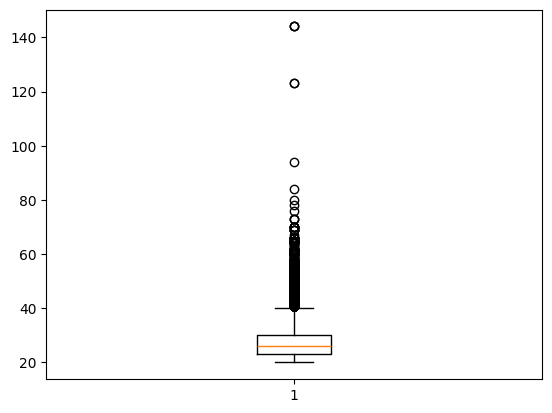

In [10]:
fig = plt.boxplot(idade)
fig

In [11]:
#Filtrando pessoas com idade inferior a 45 anos

idade = dataset_credit_risk["person_age"][dataset_credit_risk["person_age"] <= 45]
idade = pd.DataFrame(idade)
idade.head()

,person_age
0,22
1,21
2,25
3,23
4,24


{'whiskers': [<matplotlib.lines.Line2D at 0x7f5dd09e1ff0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5dd09e2530>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5dd09e1e70>],
 'medians': [<matplotlib.lines.Line2D at 0x7f5dd09e2a70>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f5dd09e2d10>],
 'means': []}

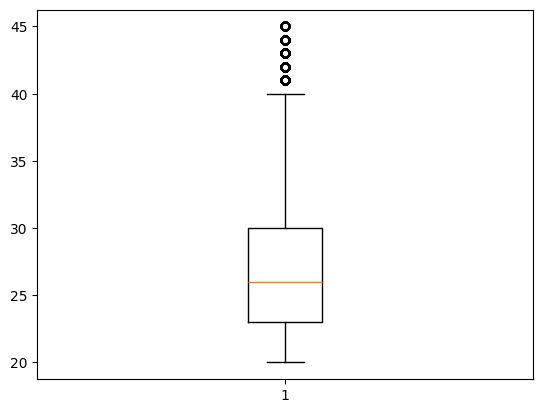

In [12]:
#Plotando a visualização

fig = plt.boxplot(idade)
fig

* Após alterar a idade reduzindo a visualização para demonstrar o gráfico até idade 45 anos é possivel avaliar que a quantidade
de outliers diminuiu de forma considerável

In [13]:
#Avaliando o percentual de endividamento por conta do empréstimo

endividamento = dataset_credit_risk["loan_percent_income"]
endividamento = pd.DataFrame(endividamento)

#Estatisticas descritivas

endividamento.describe().round(2)


,loan_percent_income
count,32581.00
mean,0.17
std,0.11
min,0.00
25%,0.09
50%,0.15
75%,0.23
max,0.83


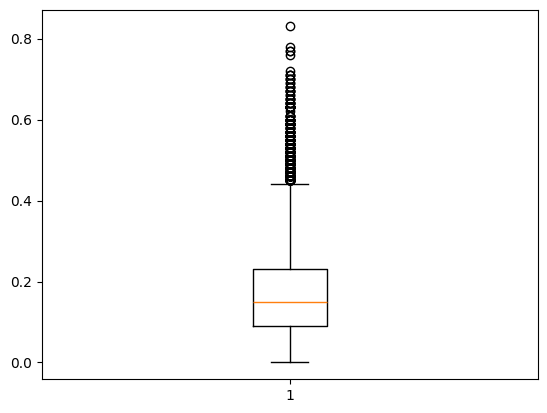

In [14]:
#Plotando a visualização

fig = plt.boxplot(endividamento)

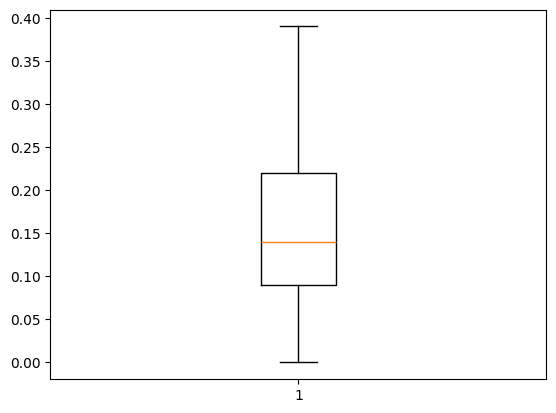

In [15]:
#Avaliando a distribuição com percentual de 40%

endividamento = dataset_credit_risk[dataset_credit_risk["loan_percent_income"] < 0.40 ]
endividamento = endividamento["loan_percent_income"]

fig = plt.boxplot(endividamento)


* É possivel avaliar que abaixo de 40% de renda comprometido não existe mais outliers, por definição do banco acredito que seja mais seguro oferta empréstimo para cliente não comprometa sua renda por completo.

# 2 - Definição da Políticas de crédito e Modelagem

Objetivo é definir o perfil de pessoa onde irei aprovar um crédito ou não, Após análise exploratória os diretores e gerente do banco chegaram nas seguintes políticas:

* Todos os requisitos precisam ser satisfeitos para possuirem a variavel target = 1

Target = 1 (Cliente onde iremos aprovar crédito) e Target = 0 (Cliente onde não possui o perfil desejado pelo banco)

1 - Limite de crédito:

Minimo R$ 8.000,00 e Máximo R$ 12.200,00 (mais público entre Q2 - Q3)

2 - Inadimplência passada

Clientes que tem registro de inadimplência anterior não terá crédito aprovado

se cb_person_default_on_file = Y então o crédito será negado, caso contrario o crédito ser

3 - Emprego

Possuir emprego fixo por 1 ano seguidos

4 - Idades

Possuir idade igual ou inferior a 45 anos

5 - Percentual de renda

Não será aprovado empréstimo que comprometa mais que 24% da renda anual



In [16]:
# Remover registros duplicados

dataset_credit_risk.drop_duplicates(keep="first", inplace=True)

In [17]:
# Aplicar as políticas do banco para obter a variavel target

# A - Limite de crédito 

dataset_credit_risk["credit"] = np.where((dataset_credit_risk["loan_amnt"] >= 8000) & (dataset_credit_risk["loan_amnt"] <= 12000), 1, 0)

# B - inadimplencia anterior

dataset_credit_risk["inadimplencia"] = np.where((dataset_credit_risk["cb_person_default_on_file"] == "Y"), 0, 1)

# C - Emprego

dataset_credit_risk["emprego"] = np.where((dataset_credit_risk["person_emp_length"] >= 1.0), 1, 0)

# D - Idade

dataset_credit_risk["idade"] = np.where((dataset_credit_risk["person_age"] <= 45), 1, 0)

# E - Percentual de renda

dataset_credit_risk["renda"] = np.where((dataset_credit_risk["loan_percent_income"] <= 0.24), 1, 0)

In [18]:
dataset_credit_risk["credit"].value_counts()

credit
0    23044
1     8851
Name: count, dtype: int64

In [19]:
dataset_credit_risk["inadimplencia"].value_counts()

inadimplencia
1    26209
0     5686
Name: count, dtype: int64

In [20]:
dataset_credit_risk["emprego"].value_counts()

emprego
1    26998
0     4897
Name: count, dtype: int64

In [21]:
dataset_credit_risk["idade"].value_counts()

idade
1    31264
0      631
Name: count, dtype: int64

In [22]:
dataset_credit_risk["renda"].value_counts()

renda
1    25039
0     6856
Name: count, dtype: int64

In [23]:
# Definição da variavel target

dataset_credit_risk["target"] = np.where((dataset_credit_risk["credit"] == 1) & (dataset_credit_risk["emprego"] == 1)
 & (dataset_credit_risk["inadimplencia"] == 1) & (dataset_credit_risk["idade"] == 1) & (dataset_credit_risk["renda"] == 1), 1, 0)
dataset_credit_risk.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_percent_income,cb_person_default_on_file,credit,inadimplencia,emprego,idade,renda,target
0,22,59000,RENT,123.0,PERSONAL,35000,0.59,Y,0,0,1,1,0,0
1,21,9600,OWN,5.0,EDUCATION,1000,0.10,N,0,1,1,1,1,0
2,25,9600,MORTGAGE,1.0,MEDICAL,5500,0.57,N,0,1,1,1,0,0
3,23,65500,RENT,4.0,MEDICAL,35000,0.53,N,0,1,1,1,0,0
4,24,54400,RENT,8.0,MEDICAL,35000,0.55,Y,0,0,1,1,0,0


In [24]:
# Verificando se a variavel target foi definida corretamente

dataset_credit_risk[dataset_credit_risk["target"] == 1]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_percent_income,cb_person_default_on_file,credit,inadimplencia,emprego,idade,renda,target
44,26,300000,OWN,9.0,HOMEIMPROVEMENT,10000,0.03,N,1,1,1,1,1,1
61,22,275000,OWN,6.0,VENTURE,12000,0.04,N,1,1,1,1,1,1
68,24,255000,MORTGAGE,9.0,EDUCATION,9600,0.04,N,1,1,1,1,1,1
141,26,215000,MORTGAGE,11.0,EDUCATION,12000,0.06,N,1,1,1,1,1,1
165,24,200000,RENT,8.0,MEDICAL,12000,0.06,N,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32238,40,86500,MORTGAGE,2.0,DEBTCONSOLIDATION,10000,0.12,N,1,1,1,1,1,1
32245,36,93000,RENT,1.0,MEDICAL,12000,0.13,N,1,1,1,1,1,1
32251,36,61000,MORTGAGE,2.0,VENTURE,10000,0.16,N,1,1,1,1,1,1
32261,37,46680,MORTGAGE,6.0,VENTURE,8000,0.17,N,1,1,1,1,1,1


In [25]:
#Removendo as colunas auxiliares

dataset_credit_risk = dataset_credit_risk[["person_age", "person_income", "person_home_ownership", "person_emp_length",
"loan_intent", "loan_amnt", "loan_percent_income", "cb_person_default_on_file","target"]]

In [26]:
# Converter campos strings para numéricos para que o algoritmo possa calcular

for label in ["person_age", "person_income", "person_home_ownership", "person_emp_length",
"loan_intent", "loan_amnt", "loan_percent_income", "cb_person_default_on_file","target"]:
    dataset_credit_risk[label] = LabelEncoder().fit_transform(dataset_credit_risk[label])

dataset_credit_risk.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31895 entries, 0 to 32578
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   person_age                 31895 non-null  int64
 1   person_income              31895 non-null  int64
 2   person_home_ownership      31895 non-null  int64
 3   person_emp_length          31895 non-null  int64
 4   loan_intent                31895 non-null  int64
 5   loan_amnt                  31895 non-null  int64
 6   loan_percent_income        31895 non-null  int64
 7   cb_person_default_on_file  31895 non-null  int64
 8   target                     31895 non-null  int64
dtypes: int64(9)
memory usage: 2.4 MB


In [27]:
# Separando as variaveis X (x = caracteristicas)

x = dataset_credit_risk[["person_age", "person_income", "person_home_ownership", "person_emp_length",
"loan_intent", "loan_amnt", "loan_percent_income", "cb_person_default_on_file"]]
x.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_percent_income,cb_person_default_on_file
0,2,2238,3,35,4,752,59,1
1,1,25,2,5,1,7,10,0
2,5,25,0,1,3,176,57,0
3,3,2539,3,4,3,752,53,0
4,4,1980,3,8,3,752,55,1


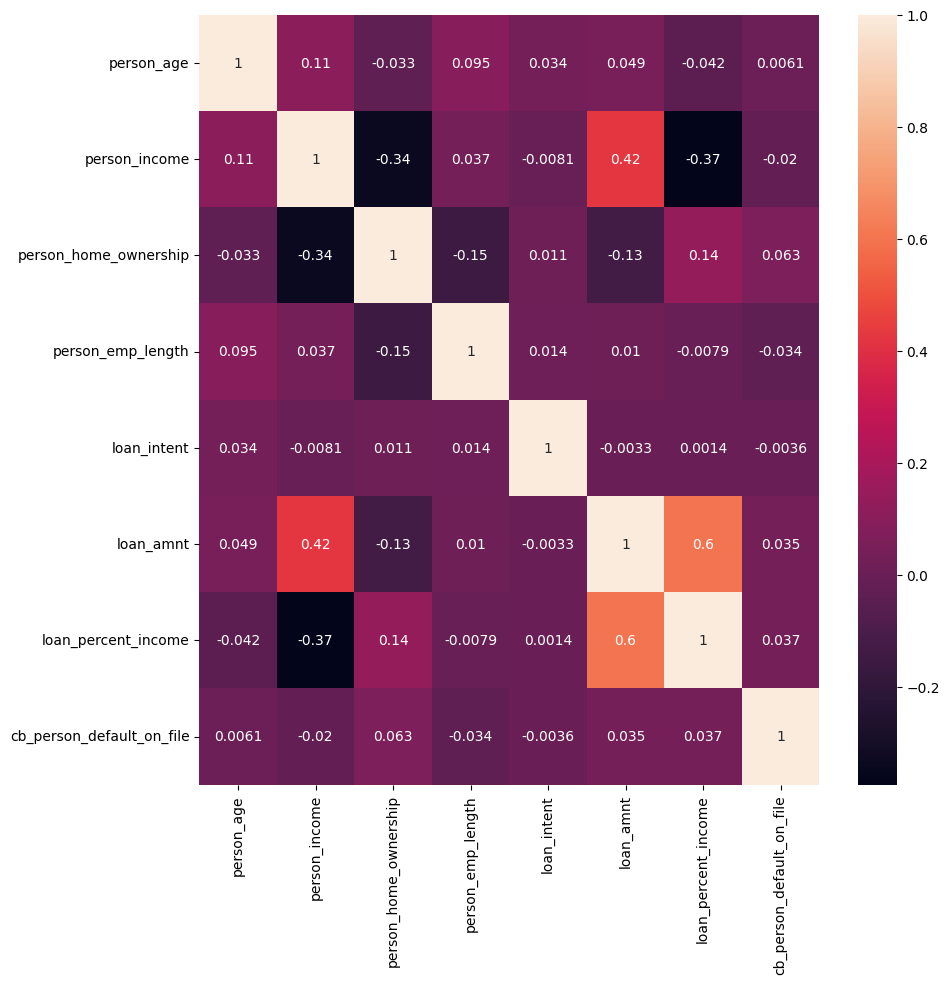

In [28]:
# Calculando as correlacoes

correlacoes = x.corr()

# plotando a correlacao

plt.figure(figsize=(10,10))
sns.heatmap(data=correlacoes, annot=True)
plt.show()

In [29]:
# Separando as variaveis Y (y = variavel target)

# converter a variavel target um array e criar a coluna Y
 
y = dataset_credit_risk["target"].values.tolist()
type(y)

list

In [30]:
# Separando o dataset em treino e teste

# Vamos seperar em 30%, ou seja 70% sera uma usada para testar

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

# 4 - Construindo Modelos de Machile Learning

* Será criado um modelo de classificação e random forest e comparar os seus desempenhos.

In [31]:
# Criando os Modelos de ML

model_RF = RandomForestClassifier(n_estimators=1000) #1000 arvores de decisao

model_XCB = XGBClassifier(n_estimators=1000, learning_rate=0.01)

In [32]:
# Treinando os modelos com os dados

model_RF = model_RF.fit(x_train, y_train)
print(model_RF)

model_XCB = model_XCB.fit(x_train, y_train)
print(model_XCB)

RandomForestClassifier(n_estimators=1000)
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


# 5 - Metrificando os Modelos de ML


In [33]:
# avaliando a acurácia dos Modelos de ML

accuracy_score_RF = model_RF.score(x_test, y_test)
accuracy_score_RF = float(accuracy_score_RF)
print("Acurácia de Random Forest:", round(accuracy_score_RF * 100,10))

accuracy_score_XCB = model_XCB.score(x_test, y_test)
accuracy_score_XCB = float(accuracy_score_XCB)
print("Acurácia de XGBoost:", round(accuracy_score_RF * 100,10))

Acurácia de Random Forest: 99.9895495872
Acurácia de XGBoost: 99.9895495872


In [55]:
# Avaliando a confusion Matrix e o classification Report

#RandomForest
mod_RF = model_RF.predict(x_test)
cm_RF = confusion_matrix(mod_RF, y_test)
print(cm_RF)
cr_RM = classification_report(mod_RF, y_test, output_dict=True)

[[8109    0]
 [   1 1459]]


In [56]:
# Convertendo dict para dataframe
df_result_RF = pd.DataFrame(cr_RM) 
df_result_RF = df_result_RF.drop(columns=['macro avg', 'weighted avg'])
df_result_RF

,0,1,accuracy
precision,0.999877,1.000000,0.999895
recall,1.000000,0.999315,0.999895
f1-score,0.999938,0.999657,0.999895
support,8109.000000,1460.000000,0.999895


In [51]:
# Avaliando a confusion Matrix e o classification Report

#XGBoost
mod_XCB = model_XCB.predict(x_test)
cm_XCB = confusion_matrix(mod_XCB, y_test)
print(cm_XCB)
cr_XCB = classification_report(mod_XCB, y_test, output_dict=True)


[[8102    1]
 [   8 1458]]


In [52]:
# Convertendo dict para dataframe
df_result_XCB = pd.DataFrame(cr_XCB) 
df_result_XCB = df_result_XCB.drop(columns=['macro avg', 'weighted avg'])
df_result_XCB

,0,1,accuracy
precision,0.999014,0.999315,0.999059
recall,0.999877,0.994543,0.999059
f1-score,0.999445,0.996923,0.999059
support,8103.000000,1466.000000,0.999059


# 6 - Conclusão

Após uma densa análise do dataset pude vivenciar uma experiência que simula atividade de um cientista de dados, estou buscando vivenciar esses desafios para que eu possa estar compatível com os requisitos de uma posição de cientista de dados, executar este estudo para mim foi importante pois puder passar por diversas etapas chegando até a etapa mais gloriosa, sendo o momento de teste e aferir as performance dos modelos que selecionei, no meu exemplo ambos os modelos tiveram resultados semelhantes, caso contrario o modelo a ser selecionado para implantar em produção com certeza é o que apresenta as melhores métricas, é importante que destacar que avaliar diversos modelos é importante para que se obtenha a melhor performance.